# GEOG5995M Final Assignment (Template)

Student ID number: 201793746 

In [3]:
# read in required packages
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import geoplot.crs as gcrs

# hide formatting warning for .catplot
import warnings
warnings.filterwarnings('ignore')


import geoplot as gplt

In [4]:
# read in dataframe containing data on Bradford school absense rates by characteristic and academic year
attendance = pd.read_csv("Attendance Academic Years 1718  2122.csv")

# check dataframe
attendance.head()

,Location,Year,Characteristic,School Type,Enrolments,Total Attendance Sessions,Total Sessions - Absence,Authorised Absence Sessions,Unauthorised Absence Sessions,Overall Absence Rate (%),Authorised Absence Rate (%),Unauthorised Absence Rate (%),Enrolments - Persistent Absence (10 or more sessions),Persistent Absence Rate (%),Enrolments - Severe Absence (50 or more sessions),Severe Absence Rate
0,Bradford,201718,Ethnicity Major Any Other Ethnic Group,State-funded secondary,409,138998,7152,3369,3783,5.14540,2.42378,2.72162,49,11.98044,4,0.977995
1,Bradford,201718,Ethnicity Major Any Other Ethnic Group,Special,8,2835,332,292,40,11.71076,10.29982,1.41093,2,25.00000,0,0.000000
2,Bradford,201718,Ethnicity Major Any Other Ethnic Group,State-funded primary,755,255080,10015,5767,4248,3.92622,2.26086,1.66536,75,9.93377,2,0.264901
3,Bradford,201718,Ethnicity Major Any Other Ethnic Group,Total,1172,396913,17499,9428,8071,4.40877,2.37533,2.03344,126,10.75085,6,0.511945
4,Bradford,201819,Ethnicity Major Any Other Ethnic Group,Special,10,2868,389,372,17,13.56346,12.97071,0.59275,5,50.00000,1,10.000000


In [5]:
# check data types to inform dataframe filtering criteria
attendance.dtypes

Location                                                  object
Year                                                       int64
Characteristic                                            object
School Type                                               object
Enrolments                                                 int64
Total Attendance Sessions                                  int64
Total Sessions - Absence                                   int64
Authorised Absence Sessions                                int64
Unauthorised Absence Sessions                              int64
Overall Absence Rate (%)                                 float64
Authorised Absence Rate (%)                              float64
Unauthorised Absence Rate (%)                            float64
Enrolments - Persistent Absence (10 or more sessions)      int64
Persistent Absence Rate (%)                              float64
Enrolments - Severe Absence (50 or more sessions)          int64
Severe Absence Rate      

In [6]:
# create a list of the FSM characteristics that I am interested in
characteristics = ['FSM eligible', 'FSM Not eligible']

# filter dataframe to show data for the latest year (int not object), all school types and according to FSM eligibility
attendance_2122 = attendance.loc[(attendance['Year'] == 202122) & (attendance['School Type'] == 'Total') & 
                                 (attendance['Characteristic'].isin(characteristics))]

# check filtering has worked as expected
attendance_2122

,Location,Year,Characteristic,School Type,Enrolments,Total Attendance Sessions,Total Sessions - Absence,Authorised Absence Sessions,Unauthorised Absence Sessions,Overall Absence Rate (%),Authorised Absence Rate (%),Unauthorised Absence Rate (%),Enrolments - Persistent Absence (10 or more sessions),Persistent Absence Rate (%),Enrolments - Severe Absence (50 or more sessions),Severe Absence Rate
854,Bradford,202122,FSM eligible,Total,25055,8668948,1075307,557709,517598,12.40412,6.43341,5.97071,10407,41.53662,1164,4.645779
1058,Bradford,202122,FSM Not eligible,Total,60518,21398795,1637021,1053505,583516,7.65006,4.92320,2.72686,13847,22.88080,926,1.530123


In [7]:
# remove data columns that aren't needed ahead of 'melting' the dataframe
absence = attendance_2122.drop(columns = ['Location', 'Year', 'School Type', 'Enrolments', 
                                          'Total Attendance Sessions', 'Total Sessions - Absence', 
                                          'Authorised Absence Sessions', 'Unauthorised Absence Sessions', 
                                          'Authorised Absence Rate (%)', 'Enrolments - Persistent Absence (10 or more sessions)',
                                          'Enrolments - Severe Absence (50 or more sessions)'])
absence

,Characteristic,Overall Absence Rate (%),Unauthorised Absence Rate (%),Persistent Absence Rate (%),Severe Absence Rate
854,FSM eligible,12.40412,5.97071,41.53662,4.645779
1058,FSM Not eligible,7.65006,2.72686,22.88080,1.530123


In [8]:
# melt dataframe to make it easier to explore through a visualisation
absence_melt = absence.melt(id_vars=['Characteristic'], var_name='Type of Absence', value_name='Absence Rate')
absence_melt

,Characteristic,Type of Absence,Absence Rate
0,FSM eligible,Overall Absence Rate (%),12.404120
1,FSM Not eligible,Overall Absence Rate (%),7.650060
2,FSM eligible,Unauthorised Absence Rate (%),5.970710
3,FSM Not eligible,Unauthorised Absence Rate (%),2.726860
4,FSM eligible,Persistent Absence Rate (%),41.536620
5,FSM Not eligible,Persistent Absence Rate (%),22.880800
6,FSM eligible,Severe Absence Rate,4.645779
7,FSM Not eligible,Severe Absence Rate,1.530123


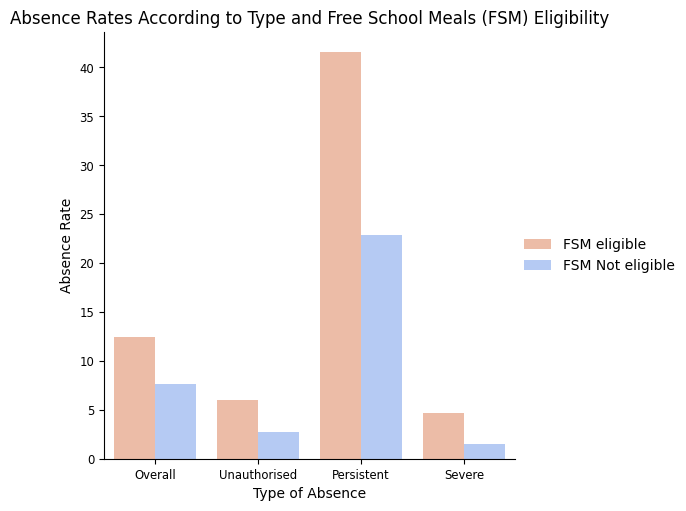

In [9]:
# plot categorical data
g = sns.catplot(data=absence_melt, x='Type of Absence', y='Absence Rate', hue='Characteristic', palette='coolwarm_r', dodge=True, kind='bar');

ax=g.ax

# set titles
ax.set_title('Absence Rates According to Type and Free School Meals (FSM) Eligibility')
g._legend.set_title(None)

# set x-axis labels
g.set_xticklabels(['Overall', 'Unauthorised', 'Persistent', 'Severe'])
g.tick_params(labelsize='small');

## Visualisation 1

Decisions....


Interpretation...


Next steps....


In [185]:
# read in Bradford schools dataframe 
schools = pd.read_csv("Schools_LA.csv")
schools

,URN,LA (code),EstablishmentNumber,EstablishmentName,TypeOfEstablishment (name),EstablishmentStatus (name),PhaseOfEducation (name),SchoolSponsors (name),OfstedLastInsp,Street,Town,Postcode,SchoolWebsite,TelephoneNum,HeadTitle (name),HeadFirstName,HeadLastName,ParliamentaryConstituency (name),OfstedRating (name)
0,107253,380,2111,Crossflatts Primary School,Community school,Open,Primary,NaN,16/10/2018,Morton Lane,Bingley,BD16 2EP,https://www.crossflatts.bradford.sch.uk/web,01274-782070,Mrs,Nicola,Bennett,Shipley,Good
1,107255,380,2113,Eldwick Primary School,Community school,Open,Primary,NaN,18/09/2018,Warren Lane,Bingley,BD16 3LE,www.eldwick.bradford.sch.uk,01274-568361,Mr,Daniel,Lomas,Shipley,Good
2,107437,380,5206,Myrtle Park Primary,Foundation school,Open,Primary,NaN,19/06/2019,Ash Terrace,Bingley,BD16 1HB,http://www.myrtleparkprimary.org,01274-564681,Mr,Kevin,Wheeler,Shipley,Good
3,107439,380,5400,Bingley Grammar School,Voluntary aided school,Open,Secondary,NaN,27/03/2018,Keighley Road,Bingley,BD16 2RS,http://www.bingleygrammar.org,01274-807700,Mr,Luke,Weston,Shipley,Good
4,139975,380,4064,Beckfoot School,Academy converter,Open,Secondary,Beckfoot Trust,05/06/2014,Wagon Lane,Bingley,BD16 1EE,www.beckfoot.org,01274-771444,Mr,Simon,Wade,Shipley,Outstanding
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,146851,380,1104,Bradford Alternative Provision Academy,Academy alternative provision converter,Open,Not applicable,Exceed Academies Trust,NaN,Baker Street,Shipley,BD18 3JE,www.bradfordapacademy.co.uk,01274-585318,Mr,Richard,Bottomley,Shipley,NaN
211,147982,380,3373,"St Anthony's Catholic Primary School, A Volunt...",Academy converter,Open,Primary,Blessed Christopher Wharton Catholic Academy T...,NaN,High Busy Lane,Shipley,BD18 1HD,http://www.stanthonysshipley.org.uk,01274-592738,Mr,Ashley,Wilkinson,Shipley,NaN
212,149093,380,2069,Baildon Glen Primary School,Academy sponsor led,Open,Primary,Exceed Academies Trust,NaN,Thompson Lane,Shipley,BD17 7LY,https://www.glenaireprimary.co.uk/,01274-582514,Mrs,Kirsty,Hutchinson,Shipley,NaN
213,149161,380,3360,Baildon Church of England Primary School,Academy converter,Open,Primary,Bradford Diocesan Academies Trust,NaN,Coverdale Way,Shipley,BD17 6TE,www.baildonce.co.uk,01274-598540,Mrs,Katie,Savage,Shipley,NaN


In [186]:
# create a list of the education settings that I am interested in
settings = ['Primary', 'Secondary', 'All-through']

# filter dataframe to remove nursery, post-16 and NA settings
schools = schools.loc[(schools['PhaseOfEducation (name)'].isin(settings))]

# check filtering has worked as expected
schools

,URN,LA (code),EstablishmentNumber,EstablishmentName,TypeOfEstablishment (name),EstablishmentStatus (name),PhaseOfEducation (name),SchoolSponsors (name),OfstedLastInsp,Street,Town,Postcode,SchoolWebsite,TelephoneNum,HeadTitle (name),HeadFirstName,HeadLastName,ParliamentaryConstituency (name),OfstedRating (name)
0,107253,380,2111,Crossflatts Primary School,Community school,Open,Primary,NaN,16/10/2018,Morton Lane,Bingley,BD16 2EP,https://www.crossflatts.bradford.sch.uk/web,01274-782070,Mrs,Nicola,Bennett,Shipley,Good
1,107255,380,2113,Eldwick Primary School,Community school,Open,Primary,NaN,18/09/2018,Warren Lane,Bingley,BD16 3LE,www.eldwick.bradford.sch.uk,01274-568361,Mr,Daniel,Lomas,Shipley,Good
2,107437,380,5206,Myrtle Park Primary,Foundation school,Open,Primary,NaN,19/06/2019,Ash Terrace,Bingley,BD16 1HB,http://www.myrtleparkprimary.org,01274-564681,Mr,Kevin,Wheeler,Shipley,Good
3,107439,380,5400,Bingley Grammar School,Voluntary aided school,Open,Secondary,NaN,27/03/2018,Keighley Road,Bingley,BD16 2RS,http://www.bingleygrammar.org,01274-807700,Mr,Luke,Weston,Shipley,Good
4,139975,380,4064,Beckfoot School,Academy converter,Open,Secondary,Beckfoot Trust,05/06/2014,Wagon Lane,Bingley,BD16 1EE,www.beckfoot.org,01274-771444,Mr,Simon,Wade,Shipley,Outstanding
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,146512,380,2050,Wycliffe CofE Primary School,Academy sponsor led,Open,Primary,Bradford Diocesan Academies Trust,NaN,Saltaire Road,Shipley,BD18 3HZ,https://wycliffeprimary.org/,01274-584779,Mrs,Denise,Baxter,Shipley,NaN
209,146536,380,2053,Shipley CofE Primary School,Academy sponsor led,Open,Primary,Bradford Diocesan Academies Trust,15/09/2022,Otley Road,Shipley,BD18 2PT,www.shipleyceprimary.org.uk,01274-583900,Mr,Gavin,Hamilton,Shipley,Good
211,147982,380,3373,"St Anthony's Catholic Primary School, A Volunt...",Academy converter,Open,Primary,Blessed Christopher Wharton Catholic Academy T...,NaN,High Busy Lane,Shipley,BD18 1HD,http://www.stanthonysshipley.org.uk,01274-592738,Mr,Ashley,Wilkinson,Shipley,NaN
212,149093,380,2069,Baildon Glen Primary School,Academy sponsor led,Open,Primary,Exceed Academies Trust,NaN,Thompson Lane,Shipley,BD17 7LY,https://www.glenaireprimary.co.uk/,01274-582514,Mrs,Kirsty,Hutchinson,Shipley,NaN


In [187]:
# create a new column for Ofsted rating value 
schools['Ofsted Rating'] = schools['OfstedRating (name)']
schools.head()

,URN,LA (code),EstablishmentNumber,EstablishmentName,TypeOfEstablishment (name),EstablishmentStatus (name),PhaseOfEducation (name),SchoolSponsors (name),OfstedLastInsp,Street,Town,Postcode,SchoolWebsite,TelephoneNum,HeadTitle (name),HeadFirstName,HeadLastName,ParliamentaryConstituency (name),OfstedRating (name),Ofsted Rating
0,107253,380,2111,Crossflatts Primary School,Community school,Open,Primary,NaN,16/10/2018,Morton Lane,Bingley,BD16 2EP,https://www.crossflatts.bradford.sch.uk/web,01274-782070,Mrs,Nicola,Bennett,Shipley,Good,Good
1,107255,380,2113,Eldwick Primary School,Community school,Open,Primary,NaN,18/09/2018,Warren Lane,Bingley,BD16 3LE,www.eldwick.bradford.sch.uk,01274-568361,Mr,Daniel,Lomas,Shipley,Good,Good
2,107437,380,5206,Myrtle Park Primary,Foundation school,Open,Primary,NaN,19/06/2019,Ash Terrace,Bingley,BD16 1HB,http://www.myrtleparkprimary.org,01274-564681,Mr,Kevin,Wheeler,Shipley,Good,Good
3,107439,380,5400,Bingley Grammar School,Voluntary aided school,Open,Secondary,NaN,27/03/2018,Keighley Road,Bingley,BD16 2RS,http://www.bingleygrammar.org,01274-807700,Mr,Luke,Weston,Shipley,Good,Good
4,139975,380,4064,Beckfoot School,Academy converter,Open,Secondary,Beckfoot Trust,05/06/2014,Wagon Lane,Bingley,BD16 1EE,www.beckfoot.org,01274-771444,Mr,Simon,Wade,Shipley,Outstanding,Outstanding


In [188]:
# replace strings in 'Ofsted Rating' with numbers so that values can be ordered and to aid visulisation
schools['Ofsted Rating'].replace('Serious Weaknesses', 1, inplace=True)
schools['Ofsted Rating'].replace('Inadequate', 2, inplace=True)
schools['Ofsted Rating'].replace('Requires improvement', 3, inplace=True)
schools['Ofsted Rating'].replace('Good', 4, inplace=True)
schools['Ofsted Rating'].replace('Outstanding', 5, inplace=True)

schools.head()

,URN,LA (code),EstablishmentNumber,EstablishmentName,TypeOfEstablishment (name),EstablishmentStatus (name),PhaseOfEducation (name),SchoolSponsors (name),OfstedLastInsp,Street,Town,Postcode,SchoolWebsite,TelephoneNum,HeadTitle (name),HeadFirstName,HeadLastName,ParliamentaryConstituency (name),OfstedRating (name),Ofsted Rating
0,107253,380,2111,Crossflatts Primary School,Community school,Open,Primary,NaN,16/10/2018,Morton Lane,Bingley,BD16 2EP,https://www.crossflatts.bradford.sch.uk/web,01274-782070,Mrs,Nicola,Bennett,Shipley,Good,4.0
1,107255,380,2113,Eldwick Primary School,Community school,Open,Primary,NaN,18/09/2018,Warren Lane,Bingley,BD16 3LE,www.eldwick.bradford.sch.uk,01274-568361,Mr,Daniel,Lomas,Shipley,Good,4.0
2,107437,380,5206,Myrtle Park Primary,Foundation school,Open,Primary,NaN,19/06/2019,Ash Terrace,Bingley,BD16 1HB,http://www.myrtleparkprimary.org,01274-564681,Mr,Kevin,Wheeler,Shipley,Good,4.0
3,107439,380,5400,Bingley Grammar School,Voluntary aided school,Open,Secondary,NaN,27/03/2018,Keighley Road,Bingley,BD16 2RS,http://www.bingleygrammar.org,01274-807700,Mr,Luke,Weston,Shipley,Good,4.0
4,139975,380,4064,Beckfoot School,Academy converter,Open,Secondary,Beckfoot Trust,05/06/2014,Wagon Lane,Bingley,BD16 1EE,www.beckfoot.org,01274-771444,Mr,Simon,Wade,Shipley,Outstanding,5.0


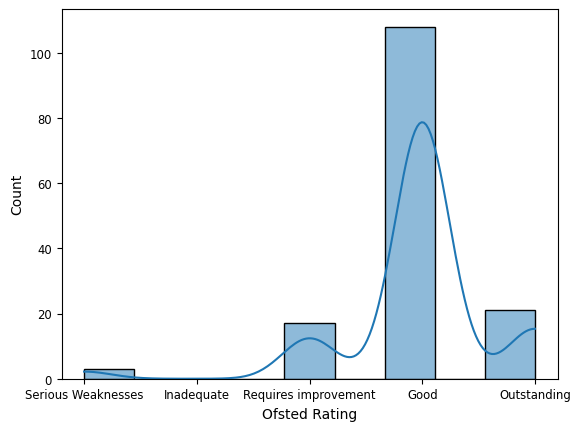

In [189]:
g = sns.histplot(schools['Ofsted Rating'], kde=True)

# set x-axis labels
g.set_xticks([x + 1 for x in range(5)],
                  labels=['Serious Weaknesses', 'Inadequate', 'Requires improvement', 'Good', 'Outstanding'])
g.tick_params(labelsize='small');

In [177]:
'''schools['Performance'] = schools['Ofsted Rating']
schools.head()'''

,URN,LA (code),EstablishmentNumber,EstablishmentName,TypeOfEstablishment (name),EstablishmentStatus (name),PhaseOfEducation (name),SchoolSponsors (name),OfstedLastInsp,Street,...,Postcode,SchoolWebsite,TelephoneNum,HeadTitle (name),HeadFirstName,HeadLastName,ParliamentaryConstituency (name),OfstedRating (name),Ofsted Rating,Performance
0,107253,380,2111,Crossflatts Primary School,Community school,Open,Primary,NaN,16/10/2018,Morton Lane,...,BD16 2EP,https://www.crossflatts.bradford.sch.uk/web,01274-782070,Mrs,Nicola,Bennett,Shipley,Good,4.0,4.0
1,107255,380,2113,Eldwick Primary School,Community school,Open,Primary,NaN,18/09/2018,Warren Lane,...,BD16 3LE,www.eldwick.bradford.sch.uk,01274-568361,Mr,Daniel,Lomas,Shipley,Good,4.0,4.0
2,107437,380,5206,Myrtle Park Primary,Foundation school,Open,Primary,NaN,19/06/2019,Ash Terrace,...,BD16 1HB,http://www.myrtleparkprimary.org,01274-564681,Mr,Kevin,Wheeler,Shipley,Good,4.0,4.0
3,107439,380,5400,Bingley Grammar School,Voluntary aided school,Open,Secondary,NaN,27/03/2018,Keighley Road,...,BD16 2RS,http://www.bingleygrammar.org,01274-807700,Mr,Luke,Weston,Shipley,Good,4.0,4.0
4,139975,380,4064,Beckfoot School,Academy converter,Open,Secondary,Beckfoot Trust,05/06/2014,Wagon Lane,...,BD16 1EE,www.beckfoot.org,01274-771444,Mr,Simon,Wade,Shipley,Outstanding,5.0,5.0


In [178]:
'''# replace'Ofsted Rating' with binary performance rating
schools['Performance'].loc[schools['Performance'] <= 3] = 0
schools['Performance'].loc[schools['Performance'] > 3] = 1

schools.head()'''

,URN,LA (code),EstablishmentNumber,EstablishmentName,TypeOfEstablishment (name),EstablishmentStatus (name),PhaseOfEducation (name),SchoolSponsors (name),OfstedLastInsp,Street,...,Postcode,SchoolWebsite,TelephoneNum,HeadTitle (name),HeadFirstName,HeadLastName,ParliamentaryConstituency (name),OfstedRating (name),Ofsted Rating,Performance
0,107253,380,2111,Crossflatts Primary School,Community school,Open,Primary,NaN,16/10/2018,Morton Lane,...,BD16 2EP,https://www.crossflatts.bradford.sch.uk/web,01274-782070,Mrs,Nicola,Bennett,Shipley,Good,4.0,1.0
1,107255,380,2113,Eldwick Primary School,Community school,Open,Primary,NaN,18/09/2018,Warren Lane,...,BD16 3LE,www.eldwick.bradford.sch.uk,01274-568361,Mr,Daniel,Lomas,Shipley,Good,4.0,1.0
2,107437,380,5206,Myrtle Park Primary,Foundation school,Open,Primary,NaN,19/06/2019,Ash Terrace,...,BD16 1HB,http://www.myrtleparkprimary.org,01274-564681,Mr,Kevin,Wheeler,Shipley,Good,4.0,1.0
3,107439,380,5400,Bingley Grammar School,Voluntary aided school,Open,Secondary,NaN,27/03/2018,Keighley Road,...,BD16 2RS,http://www.bingleygrammar.org,01274-807700,Mr,Luke,Weston,Shipley,Good,4.0,1.0
4,139975,380,4064,Beckfoot School,Academy converter,Open,Secondary,Beckfoot Trust,05/06/2014,Wagon Lane,...,BD16 1EE,www.beckfoot.org,01274-771444,Mr,Simon,Wade,Shipley,Outstanding,5.0,1.0


In [190]:
# read in Bradford school absence dataframe 
absences = pd.read_csv("1_absence_3term_school.csv")
absences

,time_period,time_identifier,geographic_level,country_code,country_name,region_code,region_name,old_la_code,new_la_code,la_name,...,sess_auth_excluded_rate,sess_auth_other_rate,sess_auth_totalreasons_rate,sess_unauth_holiday_rate,sess_unauth_late_rate,sess_unauth_other_rate,sess_unauth_noyet_rate,sess_unauth_totalreasons_rate,sess_overall_totalreasons_rate,sess_x_covid_rate
0,201617,Academic year,School,E92000001,England,E12000005,West Midlands,333,E08000028,Sandwell,...,0.000000,0.093309,2.732717,0.457365,0.074188,0.790828,0.003824,1.326205,4.058922,0.00000
1,201617,Academic year,School,E92000001,England,E12000008,South East,931,E10000025,Oxfordshire,...,0.000000,0.117985,2.888068,0.000000,0.000000,0.836155,0.000000,0.836155,3.724223,0.00000
2,201415,Academic year,School,E92000001,England,E13000001,Inner London,213,E09000033,Westminster,...,0.000000,0.090848,3.457829,0.260206,0.122252,0.165994,0.283760,0.832212,4.290040,0.00000
3,201718,Academic year,School,E92000001,England,E12000002,North West,888,E10000017,Lancashire,...,0.000000,0.118161,2.948127,0.000000,0.000000,0.446059,0.000000,0.446059,3.394186,0.00000
4,201415,Academic year,School,E92000001,England,E12000008,South East,886,E10000016,Kent,...,0.000000,0.234482,2.309866,0.265067,0.013108,0.029128,0.001456,0.308759,2.618625,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169731,201314,Academic year,School,E92000001,England,E12000003,Yorkshire and The Humber,383,E08000035,Leeds,...,0.012603,0.174755,3.117859,0.436887,0.058812,0.280616,0.000000,0.776314,3.894173,0.00000
169732,202021,Academic year,School,E92000001,England,E12000002,North West,350,E08000001,Bolton,...,0.061774,0.552660,2.757455,0.143631,0.022625,1.281491,0.000000,1.447746,4.205201,29.46183
169733,201415,Academic year,School,E92000001,England,E13000002,Outer London,317,E09000026,Redbridge,...,0.074251,0.400384,3.734214,0.275538,0.267215,1.791871,0.005914,2.340536,6.074750,0.00000
169734,202122,Academic year,School,E92000001,England,E12000002,North West,341,E08000012,Liverpool,...,0.001309,0.774078,3.608656,0.766226,0.336328,3.197733,0.135447,4.435735,8.044390,0.34876


In [191]:
# filter data frame to correct date range
absences_2021 = absences.loc[(absences['time_period'] == 202021)]
absences_2021

,time_period,time_identifier,geographic_level,country_code,country_name,region_code,region_name,old_la_code,new_la_code,la_name,...,sess_auth_excluded_rate,sess_auth_other_rate,sess_auth_totalreasons_rate,sess_unauth_holiday_rate,sess_unauth_late_rate,sess_unauth_other_rate,sess_unauth_noyet_rate,sess_unauth_totalreasons_rate,sess_overall_totalreasons_rate,sess_x_covid_rate
21,202021,Academic year,School,E92000001,England,E12000005,West Midlands,860,E10000028,Staffordshire,...,0.104743,1.354102,4.703723,0.068029,0.056691,1.008288,0.002700,1.135707,5.839430,24.894852
24,202021,Academic year,School,E92000001,England,E12000008,South East,852,E06000045,Southampton,...,0.107221,8.577673,12.652068,0.000000,0.193822,6.540476,0.000000,6.734298,19.386366,1.587694
31,202021,Academic year,School,E92000001,England,E13000002,Outer London,320,E09000031,Waltham Forest,...,0.000000,8.224325,14.249121,0.143448,0.000000,0.392773,0.003415,0.539636,14.788756,6.089689
38,202021,Academic year,School,E92000001,England,E12000004,East Midlands,830,E10000007,Derbyshire,...,0.000000,0.822596,1.984039,0.158277,0.026751,0.621963,0.051273,0.858264,2.842302,16.191092
39,202021,Academic year,School,E92000001,England,E12000008,South East,936,E10000030,Surrey,...,0.046034,1.889042,4.532925,0.037160,0.039378,0.840807,0.034387,0.951731,5.484656,23.660172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169688,202021,Academic year,School,E92000001,England,E12000002,North West,909,E10000006,Cumbria,...,0.000000,0.100902,2.207977,0.047483,0.000000,0.130579,0.000000,0.178063,2.386040,15.081909
169689,202021,Academic year,School,E92000001,England,E12000003,Yorkshire and The Humber,371,E08000017,Doncaster,...,0.081818,1.868182,4.250000,0.440909,0.036364,0.929545,0.036364,1.443182,5.693182,20.645455
169716,202021,Academic year,School,E92000001,England,E12000009,South West,878,E10000008,Devon,...,0.201660,0.762122,3.846222,0.036058,0.158924,1.503766,0.147795,1.846543,5.692765,18.620791
169729,202021,Academic year,School,E92000001,England,E12000009,South West,838,E06000059,Dorset,...,0.039505,1.110207,4.819012,0.020714,0.045698,0.735654,0.000000,0.802065,5.621077,24.456588


In [192]:
# merge school absence data into schools dataframe
school_absences = pd.merge(schools, absences_2021 [['school_urn', 'sess_unauth_totalreasons_rate', 'sess_overall_totalreasons_rate']], 
                            left_on='URN', right_on='school_urn', how='inner')
school_absences

,URN,LA (code),EstablishmentNumber,EstablishmentName,TypeOfEstablishment (name),EstablishmentStatus (name),PhaseOfEducation (name),SchoolSponsors (name),OfstedLastInsp,Street,...,TelephoneNum,HeadTitle (name),HeadFirstName,HeadLastName,ParliamentaryConstituency (name),OfstedRating (name),Ofsted Rating,school_urn,sess_unauth_totalreasons_rate,sess_overall_totalreasons_rate
0,107253,380,2111,Crossflatts Primary School,Community school,Open,Primary,NaN,16/10/2018,Morton Lane,...,01274-782070,Mrs,Nicola,Bennett,Shipley,Good,4.0,107253,0.264998,2.490247
1,107255,380,2113,Eldwick Primary School,Community school,Open,Primary,NaN,18/09/2018,Warren Lane,...,01274-568361,Mr,Daniel,Lomas,Shipley,Good,4.0,107255,0.377103,2.319716
2,107437,380,5206,Myrtle Park Primary,Foundation school,Open,Primary,NaN,19/06/2019,Ash Terrace,...,01274-564681,Mr,Kevin,Wheeler,Shipley,Good,4.0,107437,0.421110,3.888451
3,107439,380,5400,Bingley Grammar School,Voluntary aided school,Open,Secondary,NaN,27/03/2018,Keighley Road,...,01274-807700,Mr,Luke,Weston,Shipley,Good,4.0,107439,0.641097,5.346953
4,139975,380,4064,Beckfoot School,Academy converter,Open,Secondary,Beckfoot Trust,05/06/2014,Wagon Lane,...,01274-771444,Mr,Simon,Wade,Shipley,Outstanding,5.0,139975,0.522885,4.798147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,142582,380,2026,High Crags Primary Leadership Academy,Academy sponsor led,Open,Primary,Star Academies,20/03/2019,Crag Road,...,01274-584068,Mrs,Helen,Ray,Shipley,Good,4.0,142582,3.095146,5.817026
170,142947,380,3371,"St Walburga's Catholic Primary School, A Volun...",Academy converter,Open,Primary,Blessed Christopher Wharton Catholic Academy T...,05/07/2019,Victoria Park,...,01274-531102,Mrs,Elizabeth,Fearnley,Shipley,Good,4.0,142947,0.230074,1.662807
171,146512,380,2050,Wycliffe CofE Primary School,Academy sponsor led,Open,Primary,Bradford Diocesan Academies Trust,NaN,Saltaire Road,...,01274-584779,Mrs,Denise,Baxter,Shipley,NaN,NaN,146512,0.615439,3.796846
172,146536,380,2053,Shipley CofE Primary School,Academy sponsor led,Open,Primary,Bradford Diocesan Academies Trust,15/09/2022,Otley Road,...,01274-583900,Mr,Gavin,Hamilton,Shipley,Good,4.0,146536,1.284963,5.306963


In [193]:
# check for missing values
school_absences['sess_unauth_totalreasons_rate'].isnull().sum()

0

In [ ]:
postcode_deprivation = pd.read_csv("2019-deprivation-by-postcode.csv")
postcode_deprivation.head()

In [194]:
schools_imd = pd.merge(school_absences, postcode_deprivation [['Postcode', 'Index of Multiple Deprivation Decile']], 
                            left_on='Postcode', right_on='Postcode', how='left')
schools_imd.head()

,URN,LA (code),EstablishmentNumber,EstablishmentName,TypeOfEstablishment (name),EstablishmentStatus (name),PhaseOfEducation (name),SchoolSponsors (name),OfstedLastInsp,Street,...,HeadTitle (name),HeadFirstName,HeadLastName,ParliamentaryConstituency (name),OfstedRating (name),Ofsted Rating,school_urn,sess_unauth_totalreasons_rate,sess_overall_totalreasons_rate,Index of Multiple Deprivation Decile
0,107253,380,2111,Crossflatts Primary School,Community school,Open,Primary,NaN,16/10/2018,Morton Lane,...,Mrs,Nicola,Bennett,Shipley,Good,4.0,107253,0.264998,2.490247,6
1,107255,380,2113,Eldwick Primary School,Community school,Open,Primary,NaN,18/09/2018,Warren Lane,...,Mr,Daniel,Lomas,Shipley,Good,4.0,107255,0.377103,2.319716,10
2,107437,380,5206,Myrtle Park Primary,Foundation school,Open,Primary,NaN,19/06/2019,Ash Terrace,...,Mr,Kevin,Wheeler,Shipley,Good,4.0,107437,0.421110,3.888451,5
3,107439,380,5400,Bingley Grammar School,Voluntary aided school,Open,Secondary,NaN,27/03/2018,Keighley Road,...,Mr,Luke,Weston,Shipley,Good,4.0,107439,0.641097,5.346953,5
4,139975,380,4064,Beckfoot School,Academy converter,Open,Secondary,Beckfoot Trust,05/06/2014,Wagon Lane,...,Mr,Simon,Wade,Shipley,Outstanding,5.0,139975,0.522885,4.798147,7


In [172]:
schools_imd['Index of Multiple Deprivation Decile'].isnull().sum()

0

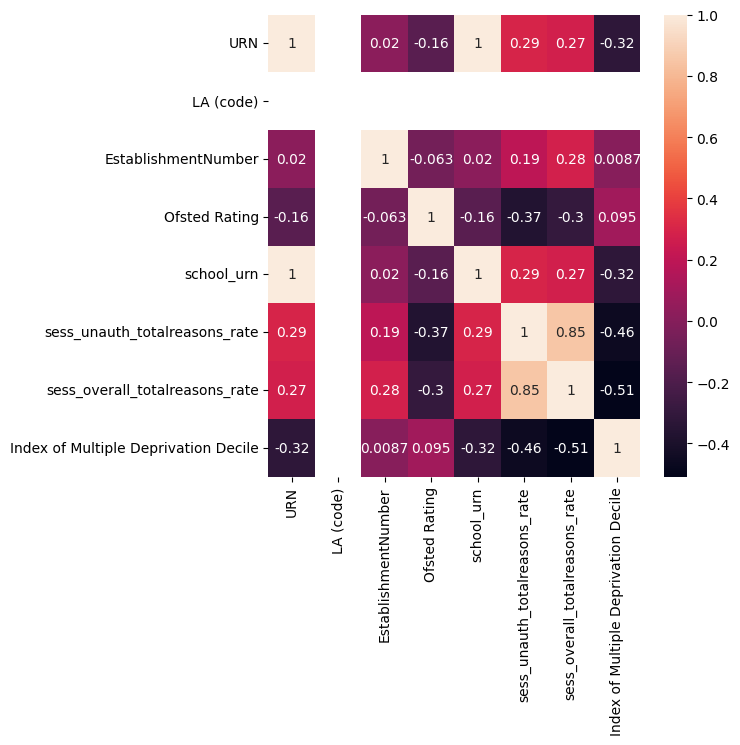

In [210]:
plt.figure(figsize=(6,6))    
sns.heatmap(schools_imd.corr(), annot = True);

In [55]:
postcodes = gpd.read_file('ONSPD_Online_Latest_Centroids (1)/ONSPD_Online_Latest_Centroids.shp')
postcodes.describe()

,OBJECTID,LAT,LONG,LEP2,IMD
count,6.310800e+04,63108.000000,63108.000000,0.0,63108.000000
mean,9.610055e+05,53.801114,-1.725329,NaN,11656.198453
std,7.137737e+05,0.061808,0.163553,NaN,9467.574125
min,1.357590e+05,53.694940,-2.182259,NaN,38.000000
25%,1.666768e+05,53.753590,-1.830618,NaN,2761.000000
50%,1.326698e+06,53.798450,-1.720253,NaN,9369.000000
75%,1.348848e+06,53.838360,-1.580814,NaN,19366.000000
max,2.599673e+06,53.979180,-1.464883,NaN,32843.000000


In [29]:
postcodes.head()

,OBJECTID,PCD,PCD2,PCDS,DOINTR,DOTERM,OSCTY,CED,OSLAUA,OSWARD,...,LEP2,PFA,IMD,CALNCV,NHSER,ICB,OA21,LSOA21,MSOA21,geometry
0,152289,BD1 1AA,BD1 1AA,BD1 1AA,199002,201703,E99999999,E99999999,E08000032,E05001347,...,NaN,E23000010,6594,E56000030,E40000012,E54000054,E00177783,E01033690,E02006948,POINT (416526.000 433330.000)
1,152290,BD1 1AE,BD1 1AE,BD1 1AE,201309,201605,E99999999,E99999999,E08000032,E05001347,...,NaN,E23000010,6594,E56000030,E40000012,E54000054,E00177783,E01033690,E02006948,POINT (416502.000 433300.000)
2,152291,BD1 1AF,BD1 1AF,BD1 1AF,201510,NaN,E99999999,E99999999,E08000032,E05001347,...,NaN,E23000010,6594,E56000030,E40000012,E54000054,E00177783,E01033690,E02006948,POINT (416546.000 433216.000)
3,152292,BD1 1AG,BD1 1AG,BD1 1AG,200708,NaN,E99999999,E99999999,E08000032,E05001347,...,NaN,E23000010,6594,E56000030,E40000012,E54000054,E00176104,E01033690,E02006948,POINT (416352.000 433047.000)
4,152293,BD1 1AH,BD1 1AH,BD1 1AH,201510,NaN,E99999999,E99999999,E08000032,E05001347,...,NaN,E23000010,6594,E56000030,E40000012,E54000054,E00177783,E01033690,E02006948,POINT (416620.000 433157.000)


In [198]:
school_centroids = pd.merge(postcodes, school_absences [['EstablishmentName', 'Postcode', 'sess_unauth_totalreasons_rate', 'sess_overall_totalreasons_rate']], 
                            left_on='PCDS', right_on='Postcode', how='right')
school_centroids

,OBJECTID,PCD,PCD2,PCDS,DOINTR,DOTERM,OSCTY,CED,OSLAUA,OSWARD,...,NHSER,ICB,OA21,LSOA21,MSOA21,geometry,EstablishmentName,Postcode,sess_unauth_totalreasons_rate,sess_overall_totalreasons_rate
0,158264,BD162EP,BD16 2EP,BD16 2EP,198001,NaN,E99999999,E99999999,E08000032,E05001342,...,E40000012,E54000054,E00054292,E01010765,E02002192,POINT (410085.000 440975.000),Crossflatts Primary School,BD16 2EP,0.264998,2.490247
1,158579,BD163LE,BD16 3LE,BD16 3LE,198001,NaN,E99999999,E99999999,E08000032,E05001342,...,E40000012,E54000054,E00176212,E01010580,E02002192,POINT (412056.000 439555.000),Eldwick Primary School,BD16 3LE,0.377103,2.319716
2,157954,BD161HB,BD16 1HB,BD16 1HB,198001,NaN,E99999999,E99999999,E08000032,E05001342,...,E40000012,E54000054,E00053430,E01010585,E02002197,POINT (410856.000 438693.000),Myrtle Park Primary,BD16 1HB,0.421110,3.888451
3,158373,BD162RS,BD16 2RS,BD16 2RS,198001,NaN,E99999999,E99999999,E08000032,E05001342,...,E40000012,E54000054,E00053441,E01010578,E02002197,POINT (410227.000 439957.000),Bingley Grammar School,BD16 2RS,0.641097,5.346953
4,157925,BD161EE,BD16 1EE,BD16 1EE,198001,NaN,E99999999,E99999999,E08000032,E05001343,...,E40000012,E54000054,E00053462,E01010596,E02002204,POINT (411428.000 438319.000),Beckfoot School,BD16 1EE,0.522885,4.798147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,160157,BD182ES,BD18 2ES,BD18 2ES,198001,NaN,E99999999,E99999999,E08000032,E05001368,...,E40000012,E54000054,E00177755,E01010777,E02002203,POINT (415263.000 436971.000),High Crags Primary Leadership Academy,BD18 2ES,3.095146,5.817026
170,160755,BD184RL,BD18 4RL,BD18 4RL,198001,NaN,E99999999,E99999999,E08000032,E05001362,...,E40000012,E54000054,E00054424,E01010788,E02002202,POINT (413952.000 437495.000),"St Walburga's Catholic Primary School, A Volun...",BD18 4RL,0.230074,1.662807
171,160395,BD183HZ,BD18 3HZ,BD18 3HZ,198001,NaN,E99999999,E99999999,E08000032,E05001362,...,E40000012,E54000054,E00054389,E01033694,E02002202,POINT (414169.000 437788.000),Wycliffe CofE Primary School,BD18 3HZ,0.615439,3.796846
172,160259,BD182PT,BD18 2PT,BD18 2PT,198001,NaN,E99999999,E99999999,E08000032,E05001362,...,E40000012,E54000054,E00054399,E01010789,E02002207,POINT (414644.000 436993.000),Shipley CofE Primary School,BD18 2PT,1.284963,5.306963


In [199]:
school_centroids['geometry'].isnull().sum()

0

In [58]:
# read in shape file 
lsoa = gpd.read_file('Lower_layer_Super_Output_Areas_2021_EW_BFC_V8/LSOA_2021_EW_BFC_V8.shp')
lsoa.head()

,LSOA21CD,LSOA21NM,BNG_E,BNG_N,LONG,LAT,GlobalID,geometry
0,E01010947,Calderdale 023B,415303,421781,-1.76973,53.6923,27896a78-71ce-4f51-b7e2-83e529038465,"POLYGON ((414708.000 422491.000, 414736.000 42..."
1,E01011923,Wakefield 019B,432713,421695,-1.50610,53.6907,b476b75c-2e3c-43e0-93ee-b50c9a9bec4e,"POLYGON ((433084.718 422046.958, 433080.076 42..."
2,E01010607,Bradford 064C,417646,433632,-1.73358,53.7987,ec228a44-498a-4137-8fc2-4be9c327d538,"POLYGON ((417710.130 433891.824, 417711.813 43..."
3,E01011292,Leeds 071B,426984,433378,-1.59183,53.7960,7f0c3c65-38f6-4713-9d72-ce8013615f00,"POLYGON ((426955.999 433621.000, 426957.357 43..."
4,E01011649,Leeds 022B,434474,439541,-1.47744,53.8510,dab83c56-ab7a-4dce-9147-ceb58ff8110d,"POLYGON ((434985.786 440419.754, 435000.056 44..."


In [60]:
imd = pd.read_csv('IMD2019_Index_of_Multiple_Deprivation.csv')
imd.head()

,LSOA code (2011),LSOA name (2011),Local Authority District code (2019),Local Authority District name (2019),Index of Multiple Deprivation (IMD) Rank,Index of Multiple Deprivation (IMD) Decile
0,E01000001,City of London 001A,E09000001,City of London,"29,199",9
1,E01000002,City of London 001B,E09000001,City of London,"30,379",10
2,E01000003,City of London 001C,E09000001,City of London,"14,915",5
3,E01000005,City of London 001E,E09000001,City of London,"8,678",3
4,E01000006,Barking and Dagenham 016A,E09000002,Barking and Dagenham,"14,486",5


In [61]:
imd_bradford = imd.loc[imd['Local Authority District name (2019)'] == 'Bradford']
imd_bradford.head()

,LSOA code (2011),LSOA name (2011),Local Authority District code (2019),Local Authority District name (2019),Index of Multiple Deprivation (IMD) Rank,Index of Multiple Deprivation (IMD) Decile
10261,E01010568,Bradford 016A,E08000032,Bradford,"23,447",8
10262,E01010569,Bradford 016B,E08000032,Bradford,"5,775",2
10263,E01010570,Bradford 018A,E08000032,Bradford,"29,423",9
10264,E01010571,Bradford 016C,E08000032,Bradford,"6,829",3
10265,E01010572,Bradford 016D,E08000032,Bradford,"22,844",7


In [62]:
# combine spatial and imd data for Bradford LSOAs
imd_bradford_lsoa = pd.merge(lsoa, imd_bradford [['LSOA code (2011)', 'Index of Multiple Deprivation (IMD) Decile']],  
                                left_on='LSOA21CD', 
                                right_on='LSOA code (2011)', 
                                how='right')
imd_bradford_lsoa.head()

,LSOA21CD,LSOA21NM,BNG_E,BNG_N,LONG,LAT,GlobalID,geometry,LSOA code (2011),Index of Multiple Deprivation (IMD) Decile
0,E01010568,Bradford 016A,416258.0,438952.0,-1.75437,53.8466,0281d0eb-2a6f-4410-9946-d87c7f54b96a,"POLYGON ((416422.170 439366.289, 416417.848 43...",E01010568,8
1,E01010569,Bradford 016B,414693.0,438453.0,-1.77818,53.8421,9d629a54-8d36-482d-b223-411decdffa9b,"POLYGON ((415369.043 439212.461, 415368.435 43...",E01010569,2
2,E01010570,Bradford 018A,413992.0,438990.0,-1.78881,53.8470,388d8821-72f3-4dc5-a9ff-63c1df687ea2,"POLYGON ((414005.260 439378.989, 414146.534 43...",E01010570,9
3,E01010571,Bradford 016C,415223.0,438398.0,-1.77013,53.8416,de49148f-b8bb-4828-9465-5ff47b599e88,"POLYGON ((415768.621 438654.729, 415766.728 43...",E01010571,3
4,E01010572,Bradford 016D,415428.0,438857.0,-1.76699,53.8457,3d4b7a55-423a-408e-ab2e-9295a461fc15,"POLYGON ((415616.807 439194.596, 415622.818 43...",E01010572,7


In [153]:
print(imd_bradford_lsoa.crs, school_centroids.crs)

EPSG:27700 EPSG:27700


In [200]:
school_centroids.describe()

,OBJECTID,LAT,LONG,LEP2,IMD,sess_unauth_totalreasons_rate,sess_overall_totalreasons_rate
count,1.740000e+02,174.000000,174.000000,0.0,174.000000,174.000000,174.000000
mean,2.273942e+05,53.815939,-1.801939,NaN,8691.057471,1.904558,5.155918
std,2.635444e+05,0.042081,0.068385,NaN,8490.288169,1.424561,2.261264
min,1.539250e+05,53.733160,-1.993703,NaN,75.000000,0.028997,1.258319
25%,1.592668e+05,53.785988,-1.832248,NaN,1728.000000,0.796595,3.454259
50%,1.668560e+05,53.807355,-1.783381,NaN,5854.000000,1.552931,5.121454
75%,1.735095e+05,53.840665,-1.753663,NaN,13863.500000,2.835677,6.503437
max,1.352598e+06,53.944490,-1.699918,NaN,31937.000000,6.944863,11.208249


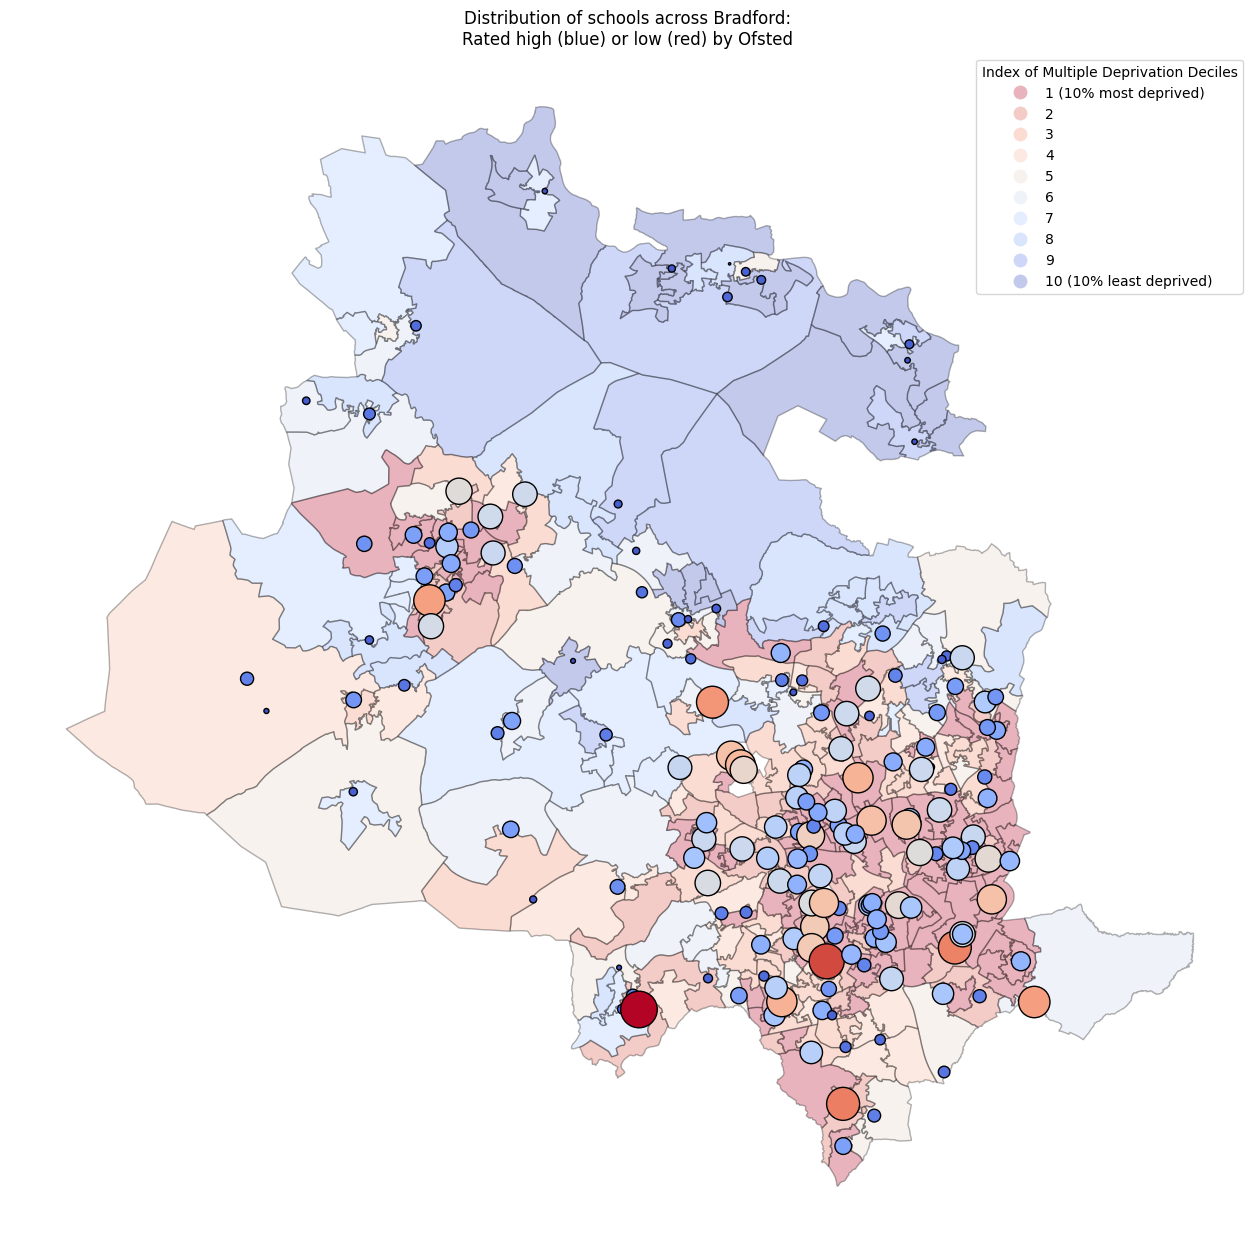

In [207]:
# create a plot
f, ax = plt.subplots(1, figsize=(16, 16))

# define the basemap plot
base = imd_bradford_lsoa.plot(ax=ax, column='Index of Multiple Deprivation (IMD) Decile', 
                              scheme='userdefined', classification_kwds={'bins':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}, 
                              cmap='coolwarm_r', alpha=0.3, edgecolor='k', legend=True)

# plot the schools on the basemap axis
school_centroids.plot(ax=base, column='sess_unauth_totalreasons_rate', 
                      cmap='coolwarm', markersize=school_centroids['sess_unauth_totalreasons_rate']*100, edgecolor='k')

# marker="D", 


# add map title
ax.set_title('Distribution of schools across Bradford: \nRated high (blue) or low (red) by Ofsted ')

# set legend1 title
ax.get_legend()
leg1 = ax.get_legend()
leg1.set_title("Index of Multiple Deprivation Deciles")

# change legend labels
for i in range(1, 11):
    leg1.get_texts()[i-1].set_text(i)
leg1.get_texts()[0].set_text('1 (10% most deprived)') 
leg1.get_texts()[9].set_text('10 (10% least deprived)') 

# remove axis
ax.set_axis_off()


plt.show();


## Visualisation 2

- Don't forget to present your final two data visualisation (one spatial and one non-spatial) and the justifications about the deicsisions you made whilst preparing and visualising the data.

Schools in Bradford are primarily clustered to the South East, in and around Bradford City, with another much smaller cluster around the town of Keighley. The majority of schools are therefore located in areas that tend to have higher levels of deprivation, making it difficult to determine a relationship between school attendance rates and the 

Whilst there are very few schools with high absence rates in the least deprived LSOAs in Bradford, there are many schools with very low attendance rates in areas with the highest deprivation. 

## Summary and Social Impact


School attendance is often seen and used as a performance metric, both for children and for schools. Frequent school absenses may be treated as a behaviour issue for the student, and overall attendance rates form part of the statutory returns submitted by schools to the Department for Education. 
